# Gutenberg Stopwords Analysis

In this work, stopwords in *blake-poems* corpus are studied in order to check which are the most frequent K stopwords for *K=25*.

In order to do it, we use the `nltk` library for the tools and even for the corpus download.

## 1. Library Imports and Constants Definition

In [85]:
# As we are going to use only specific nltk tools, we import them directly
# so that we don't have to charge them in memory

from nltk import download
from nltk.text import Text
from nltk.corpus import gutenberg, stopwords
from wordcloud import WordCloud

# Regular Expressions Library
import re

# Plotting Libraries
import matplotlib.pyplot as plt

# Download the Gutenberg corpus to local storage
download('gutenberg')

# Download the stopwords corpus to local storage
download('stopwords')

# Number of K for the Top
K = 25

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Load Data

### 2.1 Corpus

In order to work with the ``blake-poems`` corpus it's necessary to extract it from ``gutenberg`` corpora. After that, it is converted into a `Text` class providing us useful method for word count.

From original `nltk` [documentation](https://www.nltk.org/api/nltk.text.Text.html) about `Text`:

>A wrapper around a sequence of simple (string) tokens, which is intended to support initial exploration of texts 
(via the interactive console). Its methods perform a variety of analyses on the text’s contexts (e.g., counting,
concordancing, collocation discovery), and display the results. If you wish to write a program which makes use of these analyses, then you should bypass the Text class, and use the appropriate analysis function or class directly instead.

In [30]:
# Downloading the txt from Gutemberg set of corpus
cp = gutenberg.words('blake-poems.txt')

# Using Text class for simplicity
cpr = Text(cp)

### 2.2 Stopwords

>"A word that is automatically omitted from a computer-generated concordance or index" - Oxford Dictionary

Stop words are a set of **commonly used words** in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to **eliminate unimportant words**, allowing applications to focus on the important words instead.

From `nltk` it's possible to download stopwords from many different languages:

In [31]:
print("Available languages in stopwords corpus: \n")
for lang in stopwords.fileids():
    print(lang)

Available languages in stopwords corpus: 

arabic
azerbaijani
basque
bengali
catalan
chinese
danish
dutch
english
finnish
french
german
greek
hebrew
hinglish
hungarian
indonesian
italian
kazakh
nepali
norwegian
portuguese
romanian
russian
slovene
spanish
swedish
tajik
turkish


In this case, the text is is English so we get them as a list.

In [32]:

# Getting the unique set of stopwords in english
sw = stopwords.words('english')

print("Some stopwords in english: \n")
print(sw[:5])
print()
print("Number of available stopwords in English: \n")
print(len(sw))

Some stopwords in english: 

['i', 'me', 'my', 'myself', 'we']

Number of available stopwords in English: 

179


# 3. Analysis

### 3.0 Text Preprocessing

Usually, before performing any text analysis it's important to preprocess the text in order to get a standardize or normal form. 

It usually involves, in a simple preprocessing:

- Convert every word into lowercase
- Remove punctuation signs and strange characters

In [53]:
def preprocess_reviews(ls_text):
    PUNCT_SIGNS = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\&)|(\-)|(\/)|(\')")
    ls_processed_text = [word.lower() for word in ls_text if (re.search(PUNCT_SIGNS, word) == None)]
    
    return ls_processed_text

# Preprocessing the text
cp = preprocess_reviews(cp)
print(cp[:5])

# Convert it to a Text object
cpr = Text(cp)

['poems', 'by', 'william', 'blake', '1789']


### 3.1 Blake Poems Word Occurencies

First of all, it can be interesting to check the most frequent words in the text

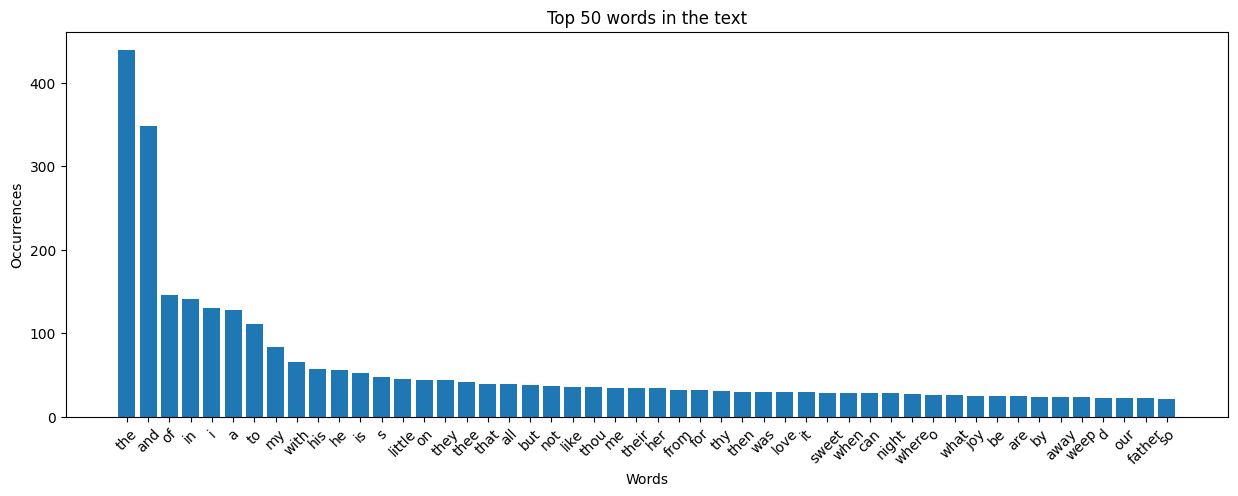

In [56]:
# Creating a dictionary storing words and their occurrences
wc_dict = {x: cpr.count(x) for x in cpr}

def plot_occurs(occur_dict, k):
    # Sorting the dictionary by occurrences in descending order
    sorted_wc = sorted(occur_dict, key= lambda x: occur_dict[x], reverse=True)

    # Getting the top K occurrences
    topk_wc = {x: occur_dict[x] for x in sorted_wc[:k]}

    # Barplot of the top K occurrences
    plt.figure(figsize=(15, 5))
    plt.bar(topk_wc.keys(), topk_wc.values())
    plt.xticks(rotation=45)
    plt.title("Top {} words in the text".format(k))
    plt.xlabel("Words")
    plt.ylabel("Occurrences");

plot_occurs(wc_dict, 50)

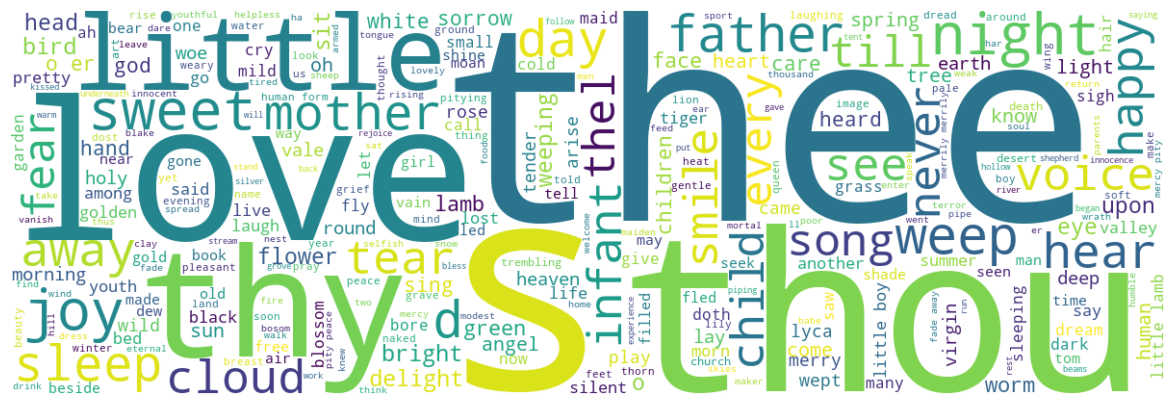

In [86]:
plt.figure(figsize=(15, 5))
wordcloud = WordCloud(max_words=300, background_color="white", width=1200, height=400).\
                generate(' '.join(cpr))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are clear stopwords like "s" from "it's" or "he's", "d" from "would", ... And they are quite common.

### 3.2 Stopword Occurencies

Filtering those of them which intersect with the set of stopwords, the following stopword occurences for Blake Poem text are obtained

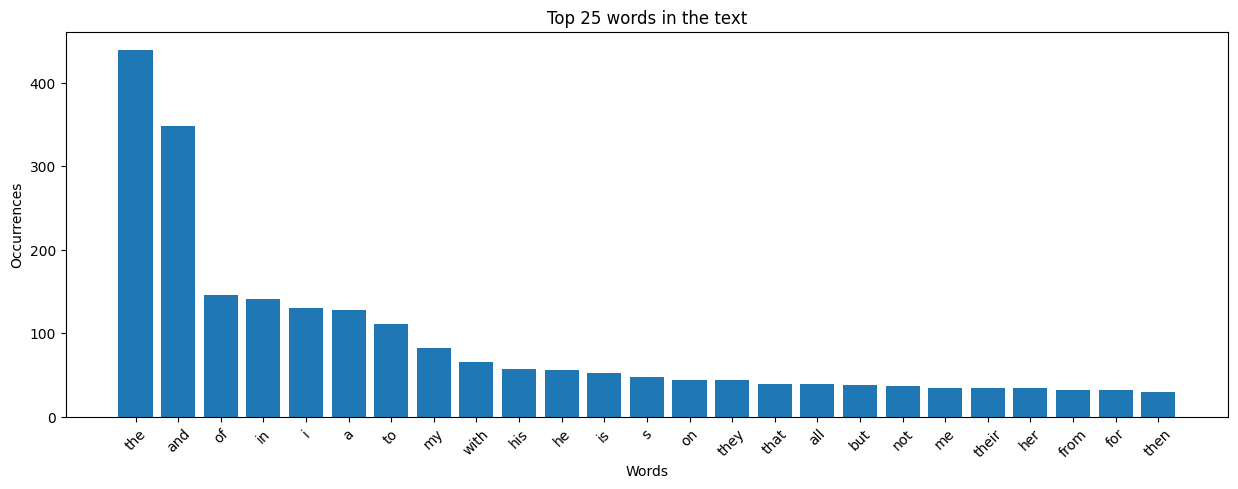

In [57]:
# Creating a dictionary storing words and their occurrences
wc_dict_wsw = {x: cpr.count(x) for x in cpr if x in sw}

plot_occurs(wc_dict_wsw, K)

### 3.3 Blake Poems Word Occurrencies WITHOUT STOPWORDS

In second place, we do the same but without the stopwords it looks like it's possible to focus in more interesting words in our text

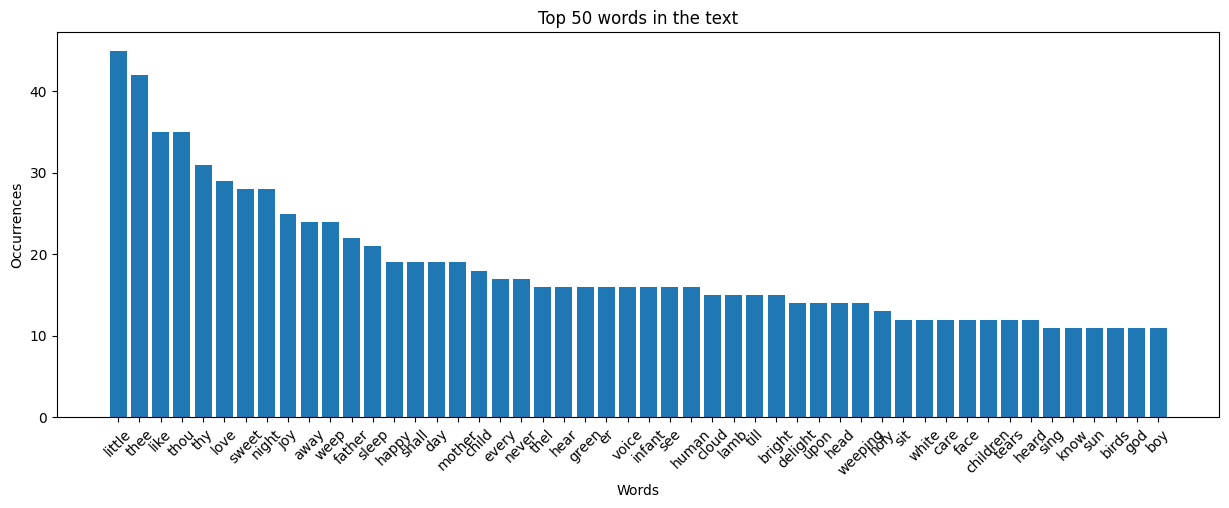

In [ ]:
# Creating a dictionary storing words and their occurrences
wc_dict_wosw = {x: cpr.count(x) for x in cpr if x not in sw}

plot_occurs(wc_dict_wosw, 50)

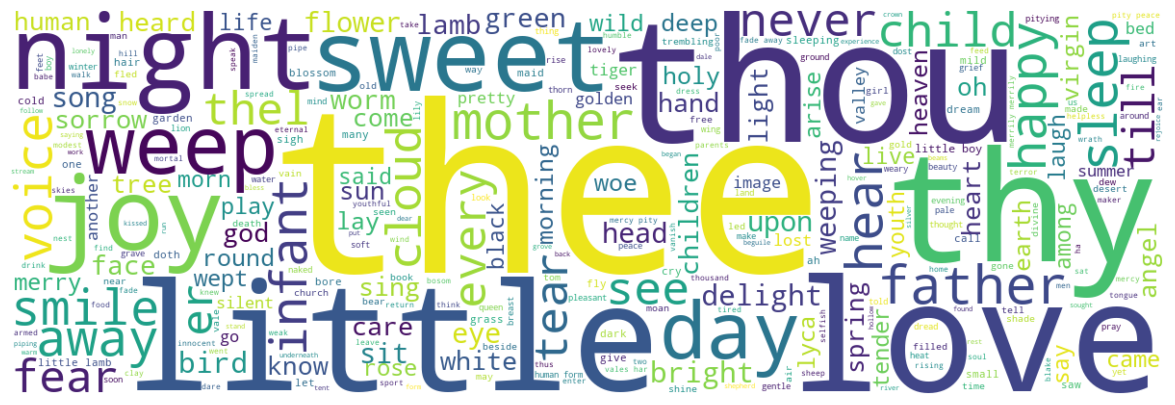

In [83]:
ls_words_wo_sw = [word for word in cpr if word not in sw]

plt.figure(figsize=(15, 5))
wordcloud = WordCloud(max_words=300, background_color="white", width=1200, height=400).\
                generate(' '.join(ls_words_wo_sw))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As the figures show, there are still some stopwords remaining such as "thou", "thy", "like" or "er". It's important to be careful with the stopwords list and usually it's better to build an specific list of stopwords depending on the task which is wanted to be solved. In this case, as we are only analysing the presence of stopwords, only `nltk` provided one is going to be used.

If the goal would be to get the most common topics in Blake Poems, then adverbs could be removed.

### 3.4 Summary Statistics

''

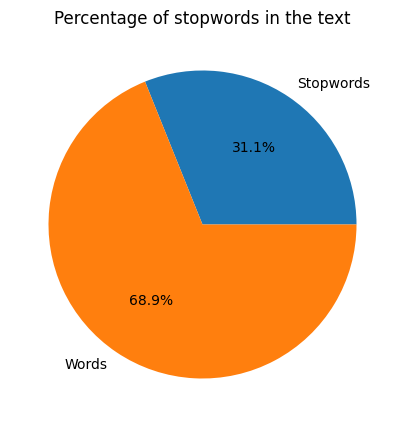

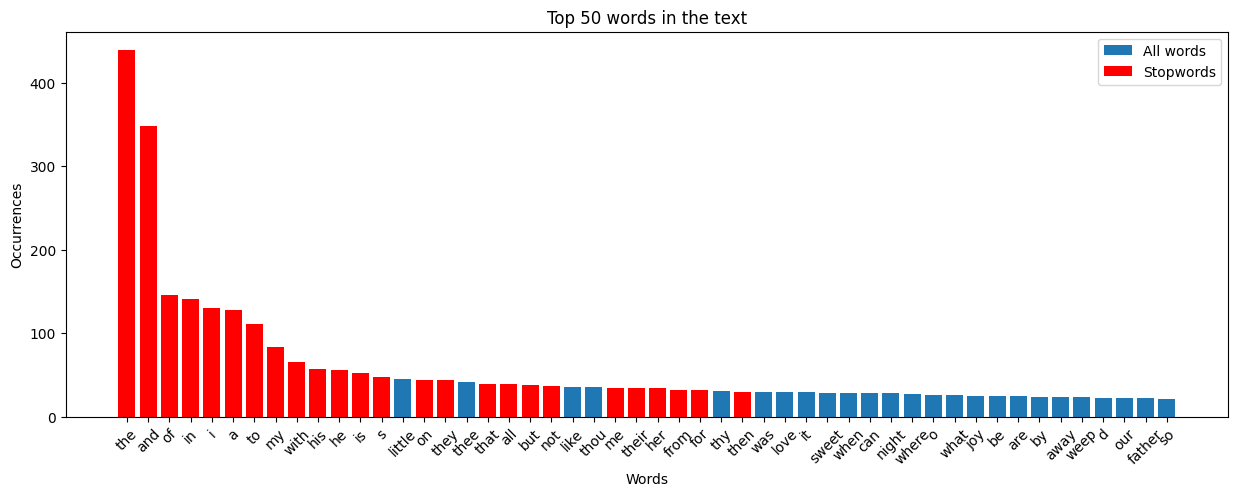

In [88]:
total_stopwords = sum(wc_dict_wsw.values())
total_words = sum(wc_dict.values())

# Plot pie chart
plt.figure(figsize=(15, 5))
plt.pie([total_stopwords, total_words], labels=["Stopwords", "Words"], autopct='%1.1f%%')
plt.title("Percentage of stopwords in the text")

plot_occurs(wc_dict, 50)
sorted_wc = sorted(wc_dict_wsw, key= lambda x: wc_dict_wsw[x], reverse=True)
topk_wc = {x: wc_dict_wsw[x] for x in sorted_wc[:K]}
plt.bar(topk_wc.keys(), topk_wc.values(), color="red")
plt.xticks(rotation=45)
plt.legend(["All words", "Stopwords"])
;

**Conclussion**: 

- As expected, the most frequent words in the text are usually stopwords that doesn't add any useful information. 
- Stopwords represent the 32% of the total number of words.
- Further stopwords removal could be done depending on the specific task to be solved
- A first idea about the poems content can be obtained after checking the most common words without stopwords (love, delight, father, smile, ...)